<a href="https://colab.research.google.com/github/seungmin-son/docker_test/blob/main/ai_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [23]:
x = np.array([
    [-2,2],
    [4,1],
    [7,6],
    [2,4],
    [11,2],

    [34,4],
    [25,10],
    [21,10],
    [24,4],
    [43,2]
  ])

y = np.array([-1,-1,-1,-1,-1,    1,1,1,1,1])

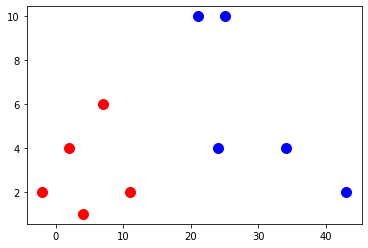

In [24]:
import matplotlib.pyplot as plt

for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, c='r')
    else:
        plt.scatter(inp[0], inp[1], s=100, c='b')

In [25]:
from sklearn.svm import SVC
import numpy as np

model = SVC(kernel='linear', C=10)
model.fit(x,y)

SVC(C=10, kernel='linear')

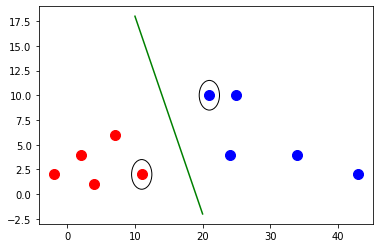

In [26]:
import matplotlib.pyplot as plt


w = model.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(10,20)
yy = a * xx - (model.intercept_[0]/w[1])

for val, inp in enumerate(x):
  if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
        plt.scatter(inp[0], inp[1], s=100, c='b')

ax = plt.gca()
plt.plot(xx,yy, c='g')

for i in range(len(model.support_vectors_[0])):
    circle = plt.Circle(model.support_vectors_[i],1.5,color = 'black',fill = False)
    ax.add_patch(circle)

In [27]:
print(model.support_vectors_)

[[11.  2.]
 [21. 10.]
 [24.  4.]]


In [28]:
model.predict([[-10,2]])
from sklearn.datasets import make_circles

x_nl, y_nl = make_circles(noise=0.1, factor = 0.2, random_state=1)
for val, inp in enumerate(x_nl):
  if y_nl[val] == 1:
        plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
        plt.scatter(inp[0], inp[1], s=100, c='b')

array([-1])

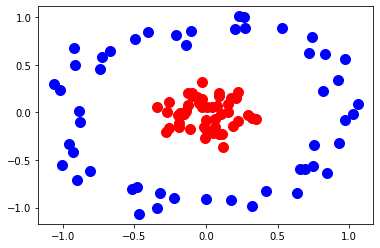

In [29]:
from sklearn.datasets import make_circles

x_nl, y_nl = make_circles(noise=0.1, factor = 0.2, random_state=1)
for val, inp in enumerate(x_nl):
  if y_nl[val] == 1:
        plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
        plt.scatter(inp[0], inp[1], s=100, c='b')

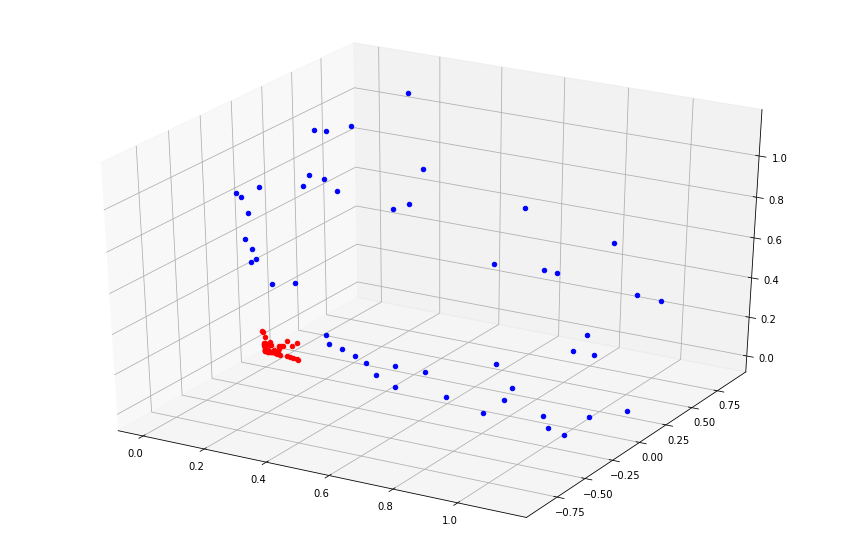

In [34]:
import math
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection='3d')
for val, inp in enumerate(x_nl):
    if y_nl[val]==1:
        x,y,z = [inp[0]*inp[0], [math.sqrt(2)* inp[0]* inp[1]], [inp[1]*inp[1]]]
        ax.scatter(x,y,z,color='r')
    else:
        x,y,z = [inp[0]*inp[0], [math.sqrt(2)* inp[0]* inp[1]], [inp[1]*inp[1]]]
        ax.scatter(x,y,z,color='b')

In [36]:
model = SVC(kernel = 'rbf', C=10)
model.fit(x_nl, y_nl)

SVC(C=10)

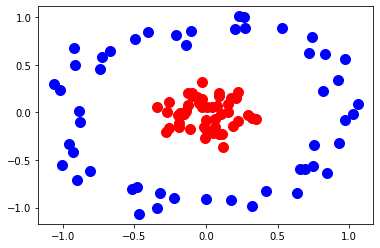

In [37]:
x_nl, y_nl = make_circles(noise=0.1, factor = 0.2, random_state=1)
for val, inp in enumerate(x_nl):
  if y_nl[val] == 1:
        plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
        plt.scatter(inp[0], inp[1], s=100, c='b')

In [38]:
model.predict([[0,0]])

array([1])

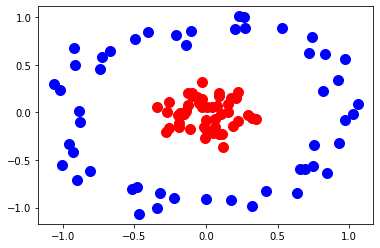

In [39]:
x_nl, y_nl = make_circles(noise=0.1, factor = 0.2, random_state=1)
for val, inp in enumerate(x_nl):
  if y_nl[val] == 1:
        plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
        plt.scatter(inp[0], inp[1], s=100, c='b')

In [41]:
import numpy as np
x = np.array([
    [-2,2],
    [4,1],
    [7, 6],
    [2, 4],
    [11, 2],

    [34,4],
    [25,10],
    [21, 6],
    [24, 4],
    [43, 2],

])


#output label
y = np.array([-1, -1, -1, -1, -1,      1, 1, 1, 1, 1])

In [42]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)

param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x, y)

print(
    "The best parameters are %s with a score of %0.2f" 
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.01} with a score of 1.00


In [43]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)

param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x, y)

print(
    "The best parameters are %s with a score of %0.2f" 
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.01} with a score of 1.00


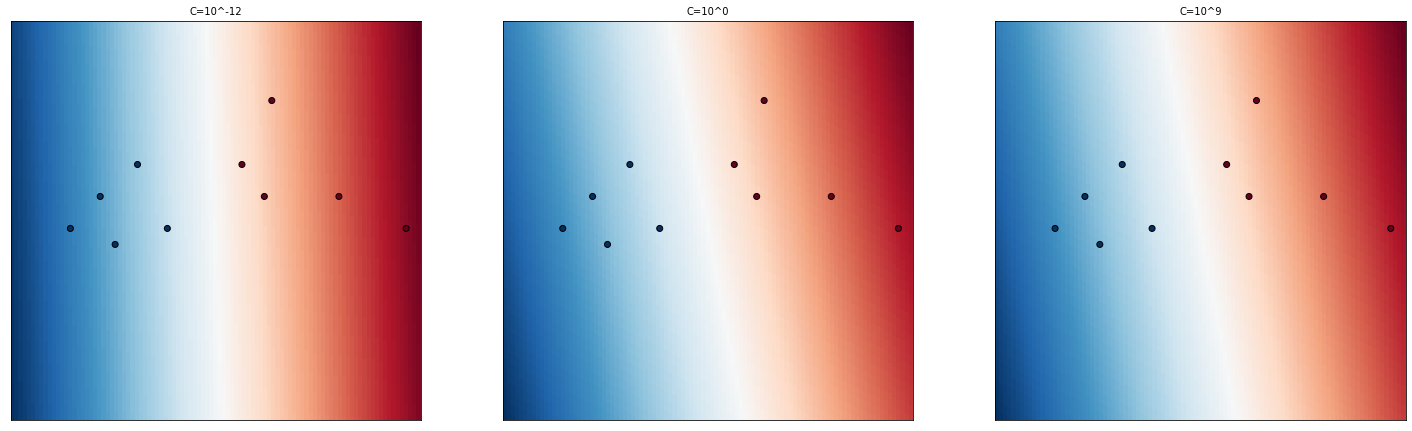

In [44]:
C_2d_range = [0.000000000001, 1, 1000000000]
classifiers = []
for C in C_2d_range:
    
    clf = SVC(kernel = 'linear',C=C)
    clf.fit(x, y)
    classifiers.append((C, clf))

plt.figure(figsize=(25, 25))
xx, yy = np.meshgrid(np.linspace(-10, 45, 100), np.linspace(-10, 15, 200))

for k, (C, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(C_2d_range), k + 1)
    plt.title("C=10^%d" % (np.log10(C)), size="medium")

    # visualize parameter's effect on decision function c를 줄일수록 타이트 
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range))

In [45]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_nl, y_nl)

print(
    "The best parameters are %s with a score of %0.2f" 
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 0.01, 'gamma': 1.0} with a score of 1.00


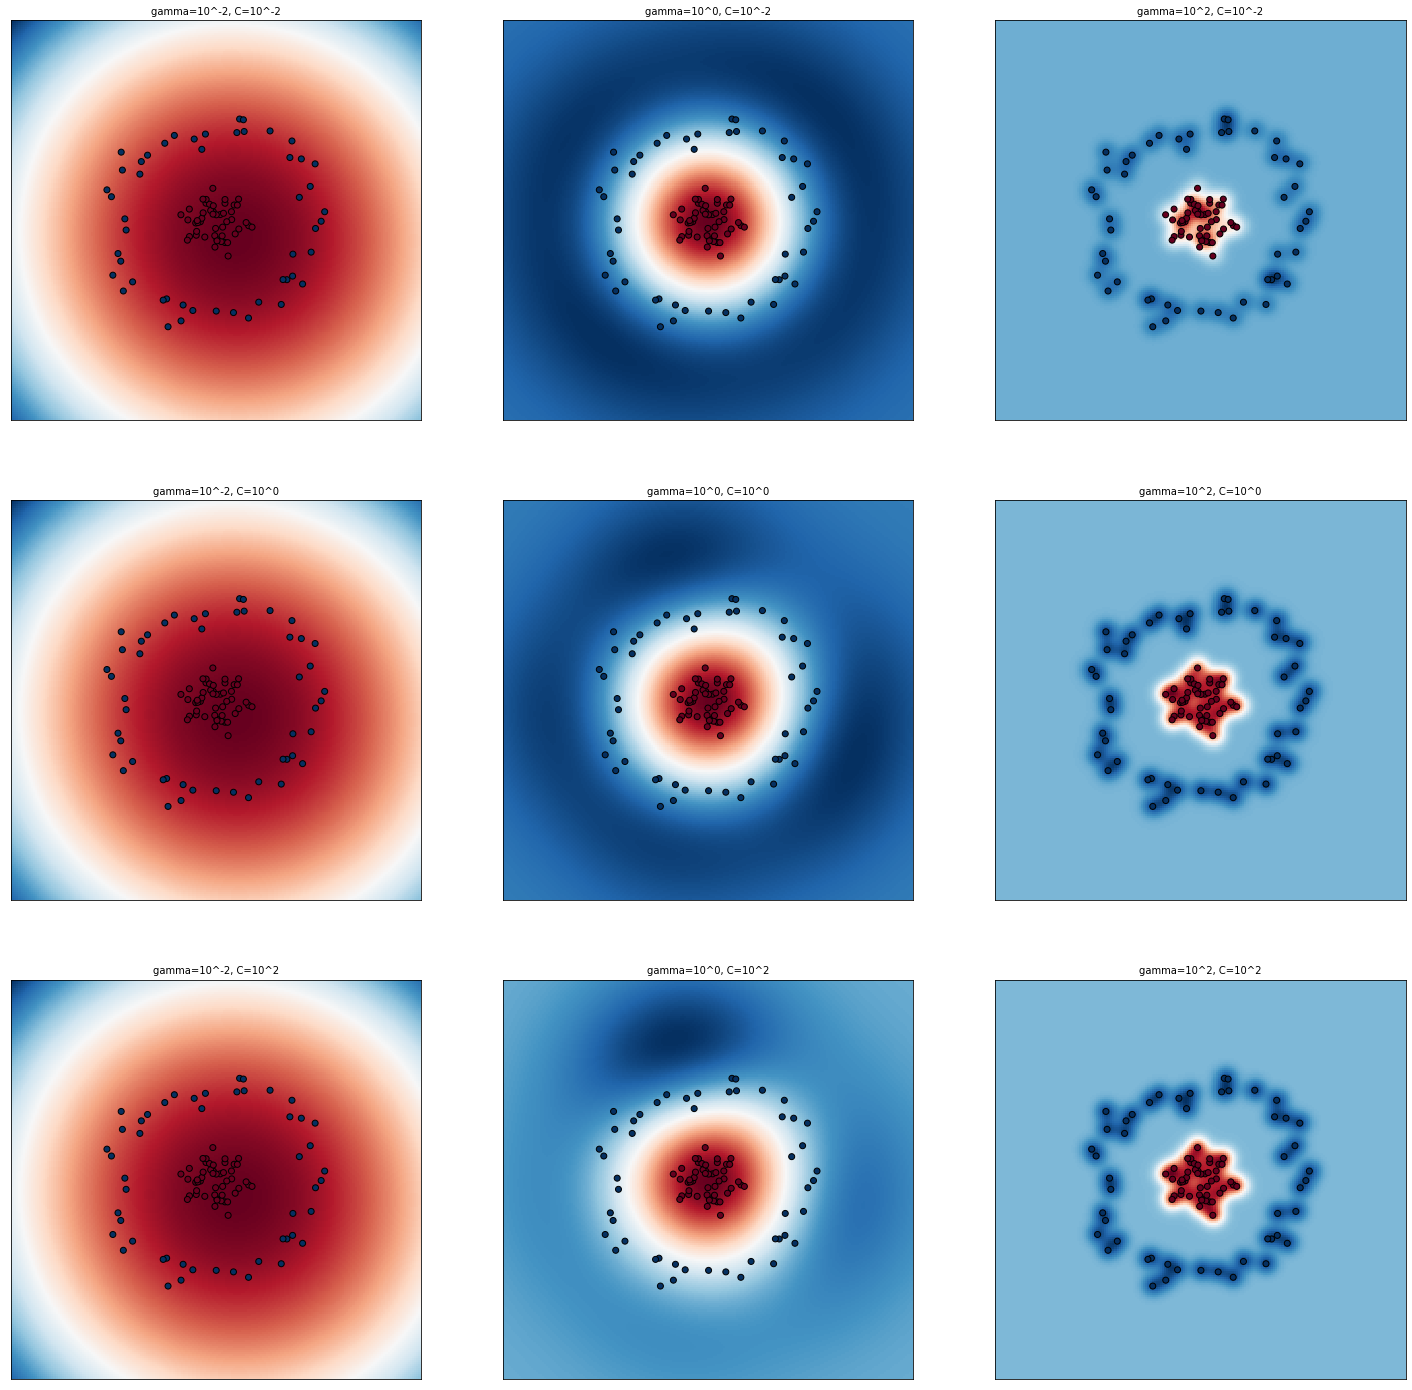

In [46]:
C_2d_range = [0.01, 1, 100]
gamma_2d_range = [0.01, 1, 100]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel = 'rbf',C=C, gamma=gamma)
        clf.fit(x_nl, y_nl)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(25, 25))
xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x_nl[:, 0], x_nl[:, 1], c=y_nl, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))